# Import packages

In [6]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
if Path.cwd().parts[-1] != 'Multifirefly-Project':
    if Path.cwd().parts[-1] != 'notebooks':
        os.chdir('..')
    from add_path import find_path
    current_path = find_path()
    os.chdir(current_path)
import sys


from data_wrangling import specific_utils, process_monkey_information, base_processing_class, combine_info_utils
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class, cluster_analysis
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, process_GUAT_trials_class, GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curvature_class, curv_of_traj_utils
from machine_learning import machine_learning_utils, hyperparameter_tuning_class
from machine_learning.RL.env_related import env_for_lstm, env_utils, base_env, collect_agent_data_utils
from machine_learning.RL.lstm import GRU_functions, LSTM_functions
from machine_learning.RL.SB3 import interpret_neural_network, sb3_for_multiff_class, rl_for_multiff_utils, SB3_functions
from visualization import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics, monkey_heading_functions
from visualization.animation import animation_func, animation_utils, animation_class
from planning_analysis.test_params_for_planning import params_test_combos_class, params_utils
from visualization.plotly_tools import plotly_for_monkey, plotly_for_scatterplot, plotly_preparation, plotly_for_correlation
from visualization.dash_tools import dash_prep_class, dash_utils, dash_utils, dash_comparison_class, dash_params_class
from visualization.dash_tools.dash_main_class_methods import dash_main_class
from non_behavioral_analysis.neural_data_analysis.get_neural_data import neural_data_processing
from non_behavioral_analysis.neural_data_analysis.visualize_neural_data import plot_neural_data, plot_modeling_result
from non_behavioral_analysis.neural_data_analysis.model_neural_data import cca_class, pgam_class, neural_data_modeling, reduce_multicollinearity
from non_behavioral_analysis.neural_data_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from non_behavioral_analysis.neural_data_analysis.planning_neural import planning_neural_class, planning_neural_utils
from planning_analysis.plan_factors import plan_factors_utils, plan_factors_class, monkey_plan_factors_x_sess_class
from planning_analysis.show_planning import nxt_ff_utils, show_planning_class, show_planning_utils
from planning_analysis.show_planning.get_stops_near_ff import find_stops_near_ff_class, find_stops_near_ff_utils, plot_stops_near_ff_class, plot_stops_near_ff_utils, plot_monkey_heading_helper_class, stops_near_ff_based_on_ref_class

from importlib import reload
from non_behavioral_analysis import eye_positions
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import itertools
import plotly.express as px
import gc
from scipy.stats import rankdata
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from math import pi
from scipy.ndimage import gaussian_filter1d
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import os, sys
from sklearn.exceptions import ConvergenceWarning
import plotly.graph_objects as go

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 101

Changed the directory to 'Multifirefly-Project'.
Added /Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods to the path.


# Plotly

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0328/ff_dataframe.h5
Failed to retrieve shared_stops_near_ff_df; will make new shared_stops_near_ff_df
Making shared_stops_near_ff_df...
56 rows out of 1213 rows were removed from closest_stop_to_capture_df because the distance between stop and ff center is larger than 25cm, 
finding captured_ff_info...
There is a problem with the closest point to capture time in that the difference between the time and the caught time is greater than 0.2 seconds.The maximum difference is 0.332014000000072 seconds. Additionally, there are 1 rows that exceed this limit. Furthermore, the percentage of rows where the difference is positive is 1.9878997407087293 %
1 rows out of 1034 rows in captured_ff_info have been removed because the diff_from_caught_time 

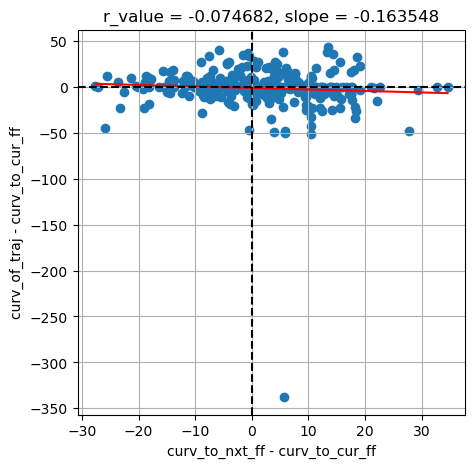

In [7]:

normalize = False
eliminate_outliers = False
use_curvature_to_ff_center = False
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 25]
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

#data_item_info = find_stops_near_ff_utils.extract_key_info_from_data_item_for_stops_near_ff_class(data_item)

snf = stops_near_ff_based_on_ref_class.StopsNearFFBasedOnRef(raw_data_folder_path=raw_data_folder_path)
snf.get_more_monkey_data()
snf.traj_curv_descr = 'Traj Curv: From Current Point to Right Before Stop'



snf.streamline_organizing_info(ref_point_mode='distance', ref_point_value=-150, 
                              #ref_point_mode='time after cur ff visible', ref_point_value=0.1, 
                               curv_of_traj_mode=curv_of_traj_mode, window_for_curv_of_traj=window_for_curv_of_traj, truncate_curv_of_traj_by_time_of_capture=True,
                               use_curvature_to_ff_center=use_curvature_to_ff_center,  eliminate_outliers=eliminate_outliers,
                               stops_near_ff_df_exists_ok=True)

snf.ax_for_corr = snf.find_relationships_from_info(normalize=normalize, show_plot=True)
snf.prepare_to_make_plots()

In [8]:
current_i = 2
snf.make_PlotTrials_args()

In [10]:
current_i = snf.make_individual_plotly_plots(current_i, max_num_plot_to_make=1, 
                                             show_eye_positions_for_both_eyes=True)

diff_in_abs: 14.930604975441064
duration_to_plot: [37.366437, 44.825224]


# Variables of interest

## diff_in_abs_d_heading

In [5]:

import plotly.graph_objects as go

# Generate x values
x = np.linspace(0, 4 * np.pi, 500)  # From 0 to 4π (two full turns)

# Generate y values using a sine and cosine combination
y = np.sin(x) + np.cos(x)

# Create the plot
fig = go.Figure()

# Add the smooth trajectory to the plot
fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers', name='monkey_trajectory', line_shape='spline'))

# Update layout for better visualization
fig.update_layout(
    title='Monkey Trajectory',
    xaxis_title='X Axis',
    yaxis_title='Y Axis',
    legend_title='Legend'
)

# Show the plot
fig.show()